# 1. Autoencoder-based anomaly detection model

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
# Load the dataset (replace 'data.csv' with your dataset file path)
data = pd.read_csv('NetworkData.csv')

C:\Users\patri\AppData\Local\Temp\ipykernel_19496\1745640886.py:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('NetworkData.csv')


In [5]:
data.head(2)

srcip  sport          dstip dsport proto state       dur  sbyte  \
0  59.166.0.0   1390  149.171.126.6     53   udp   CON  0.001055    132   
1  59.166.0.0  33661  149.171.126.9   1024   udp   CON  0.036133    528   

   dbyte  sttl  ...  ct_ftp_cmd  ct_srv_src  ct_srv_dst ct_dst_ltm  \
0    164    31  ...           0           3           7          1   
1    304    31  ...           0           2           4          2   

   ct_src_ ltm  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0            3                 1                 1               1   
1            3                 1                 1               2   

   attack_cat  Label  
0   No Attack      0  
1   No Attack      0  

[2 rows x 49 columns]

In [6]:
data.describe()

dur         sbyte         dbyte           sttl  \
count  700001.000000  7.000010e+05  7.000010e+05  700001.000000   
mean        0.863391  5.009637e+03  4.833038e+04      38.513848   
std        25.935765  4.489868e+04  1.860516e+05      39.996956   
min         0.000000  0.000000e+00  0.000000e+00       0.000000   
25%         0.003931  4.240000e+02  3.040000e+02      31.000000   
50%         0.027594  2.024000e+03  3.380000e+03      31.000000   
75%         0.346518  3.806000e+03  2.243200e+04      31.000000   
max      8786.637695  1.367739e+07  1.465542e+07     255.000000   

                dttl          sloss          dloss         Sload  \
count  700001.000000  700001.000000  700001.000000  7.000010e+05   
mean       31.980783       6.330444      21.326271  6.024271e+06   
std        30.450757      18.855979      64.733376  5.181492e+07   
min         0.000000       0.000000       0.000000  0.000000e+00   
25%        29.000000       0.000000       0.000000  7.885915e+04   
50%        29.000000       4.000000       5.000000  5.362718e+05   
75%        29.000000       7.000000      16.000000  1.078489e+06   
max       254.000000    5096.000000    5483.000000  5.268000e+09   

              Dload          Spkts  ...   is_ftp_login     ct_ftp_cmd  \
count  7.000010e+05  700001.000000  ...  700001.000000  700001.000000   
mean   3.011023e+06      41.746643  ...       0.019623       0.031116   
std    4.499952e+06      80.198729  ...       0.138700       0.278212   
min    0.000000e+00       0.000000  ...       0.000000       0.000000   
25%    7.640437e+04       4.000000  ...       0.000000       0.000000   
50%    6.686759e+05      16.000000  ...       0.000000       0.000000   
75%    3.856223e+06      52.000000  ...       0.000000       0.000000   
max    1.287619e+08   10200.000000  ...       1.000000       8.000000   

          ct_srv_src     ct_srv_dst     ct_dst_ltm    ct_src_ ltm  \
count  700001.000000  700001.000000  700001.000000  700001.000000   
mean        6.380239       6.034169       4.153233       4.668593   
std         5.075147       4.635608       3.740439       4.189667   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       2.000000       2.000000       2.000000   
50%         5.000000       5.000000       3.000000       4.000000   
75%         9.000000       8.000000       5.000000       6.000000   
max        44.000000      42.000000      42.000000      50.000000   

       ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm          Label  
count     700001.000000     700001.000000   700001.000000  700001.000000  
mean           1.685498          1.401911        2.188105       0.031736  
std            1.871052          1.426013        2.211199       0.175296  
min            1.000000          1.000000        1.000000       0.000000  
25%            1.000000          1.000000        1.000000       0.000000  
50%            1.000000          1.000000        1.000000       0.000000  
75%            2.000000          1.000000        3.000000       0.000000  
max           36.000000         34.000000       38.000000       1.000000  

[8 rows x 41 columns]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbyte             700001 non-null  int64  
 8   dbyte             700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

In [8]:
data.isnull().sum()

srcip               0
sport               0
dstip               0
dsport              0
proto               0
state               0
dur                 0
sbyte               0
dbyte               0
sttl                0
dttl                0
sloss               0
dloss               0
service             0
Sload               0
Dload               0
Spkts               0
Dpkts               0
swin                0
dwin                0
stcpb               0
dtcpb               0
smeansz             0
dmeansz             0
trans_depth         0
res_bdy_len         0
Sjit                0
Djit                0
Stime               0
Ltime               0
Sintpkt             0
Dintpkt             0
tcprtt              0
synack              0
ackdat              0
is_sm_ips_ports     0
ct_state_ttl        0
ct_flw_http_mthd    0
is_ftp_login        0
ct_ftp_cmd          0
ct_srv_src          0
ct_srv_dst          0
ct_dst_ltm          0
ct_src_ ltm         0
ct_src_dport_ltm    0
ct_dst_spo

In [11]:
data['state'].head(20)

0     CON
1     CON
2     CON
3     CON
4     CON
5     CON
6     CON
7     INT
8     CON
9     CON
10    INT
11    INT
12    INT
13    CON
14    CON
15    CON
16    CON
17    CON
18    CON
19    CON
Name: state, dtype: object

In [74]:
# Select features for training (sbyte, dbyte, Spkts, Dpkts, trans_depth) and labels (Label)
X = data[['sbyte', 'dbyte', 'Spkts', 'Dpkts', 'trans_depth']]
y = data['Label']

In [157]:
X_test[2]

array([-0.10832479, -0.25881209, -0.49560226, -0.38388948, -0.30142603])

In [75]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now, you have X_train, y_train for training and X_test, y_test for testing your anomaly detection model.

In [77]:
#Using autoencoders for anomaly detection is a promising approach

In [78]:
#Build the Autoencoder Model:
#Create an autoencoder model using Keras. You can design the architecture based on 

In [79]:
input_dim = X_train.shape[1]  # Input dimension (number of features)
encoding_dim = 32  # Size of the encoding (can be adjusted)

In [80]:
# Define the autoencoder model
model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])

In [81]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [82]:
# Train the Autoencoder:
# Train the autoencoder on the training data, where the model learns to reconstruct normal network behavior.


In [83]:
# Train the autoencoder
model.fit(X_train, X_train, epochs=2, batch_size=64, shuffle=True, validation_data=(X_test, X_test))


Epoch 1/2
8750/8750 [==============================] - 25s 3ms/step - loss: 0.7128 - val_loss: 0.6839
Epoch 2/2
8750/8750 [==============================] - 25s 3ms/step - loss: 0.7028 - val_loss: 0.6837


In [84]:
# Evaluate the Autoencoder:
# After training, evaluate the model's reconstruction error on the testing dataset. High reconstruction errors may indicate anomalies.

In [85]:
# Make predictions on the test set
reconstructed = model.predict(X_test)


4376/4376 [==============================] - 8s 2ms/step


In [86]:
reconstructed

array([[3.14420313e-01, 1.00000000e+00, 9.99999940e-01, 1.00000000e+00,
        1.41868270e-07],
       [1.13650422e-04, 2.76954900e-11, 2.83422974e-09, 4.38375985e-12,
        4.39960900e-07],
       [1.13650422e-04, 2.76954900e-11, 2.83422974e-09, 4.38375985e-12,
        4.39960900e-07],
       ...,
       [5.06219338e-04, 1.15674322e-06, 1.77927560e-03, 1.17395521e-05,
        9.01852957e-08],
       [2.77172804e-01, 1.00000000e+00, 9.99998271e-01, 1.00000000e+00,
        1.00000000e+00],
       [8.22956616e-04, 4.75470116e-03, 2.29102641e-01, 4.26797159e-02,
        1.07627656e-07]], dtype=float32)

In [87]:
print(reconstructed[:5])

[[3.1442031e-01 1.0000000e+00 9.9999994e-01 1.0000000e+00 1.4186827e-07]
 [1.1365042e-04 2.7695490e-11 2.8342297e-09 4.3837598e-12 4.3996090e-07]
 [1.1365042e-04 2.7695490e-11 2.8342297e-09 4.3837598e-12 4.3996090e-07]
 [2.7576847e-05 6.0184309e-11 8.5191558e-14 9.5399288e-14 9.9999982e-01]
 [5.2431464e-04 8.2925180e-06 8.7210620e-03 8.7143024e-05 8.9715890e-08]]


In [88]:
df = pd.DataFrame(reconstructed, columns=['sbyte', 'dbyte', 'Spkts', 'Dpkts', 'trans_depth'])
print(df.head())  # Display the first few rows of the DataFrame

      sbyte         dbyte         Spkts         Dpkts   trans_depth
0  0.314420  1.000000e+00  9.999999e-01  1.000000e+00  1.418683e-07
1  0.000114  2.769549e-11  2.834230e-09  4.383760e-12  4.399609e-07
2  0.000114  2.769549e-11  2.834230e-09  4.383760e-12  4.399609e-07
3  0.000028  6.018431e-11  8.519156e-14  9.539929e-14  9.999998e-01
4  0.000524  8.292518e-06  8.721062e-03  8.714302e-05  8.971589e-08


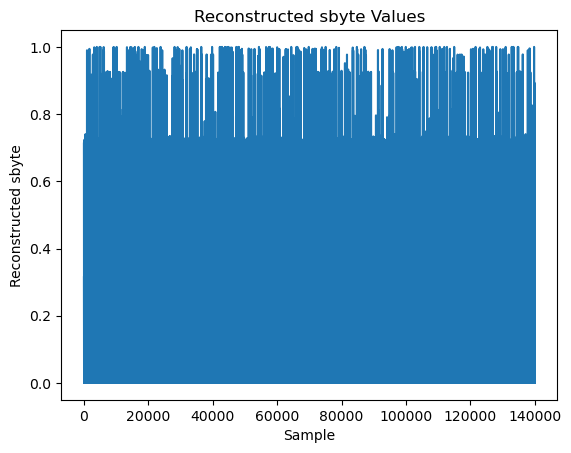

In [89]:
import matplotlib.pyplot as plt

# Visualize the first feature (sbyte)
plt.plot(reconstructed[:, 0])
plt.xlabel('Sample')
plt.ylabel('Reconstructed sbyte')
plt.title('Reconstructed sbyte Values')
plt.show()


####  MSE is a commonly used loss function for regression problems. In the context of anomaly detection with autoencoders, MSE is used to measure the difference between the input data (X_test) and the data reconstructed by the autoencoder (reconstructed). The idea is that for normal data, the autoencoder should be able to reconstruct it accurately with low MSE. However, for anomalous data (data that deviates significantly from the normal patterns learned during training), the reconstruction will have a higher MSE.
#### By calculating the MSE for each data point, you can quantify the dissimilarity between the original and reconstructed data. This dissimilarity can serve as an anomaly score, where higher MSE values suggest anomalies.

### How to Determine Anomalies?

#### To determine anomalies, you set a threshold based on the MSE values. In your code, you calculated the 95th percentile of the MSE values using np.percentile(mse, 95). This threshold is a chosen cutoff point.
#### Data points with MSE values above the threshold are considered anomalies, indicating that the autoencoder had difficulty reconstructing them accurately.
#### Data points with MSE values below the threshold are considered normal because their reconstruction closely matches the original data.

In [150]:
# Calculate the mean squared error (MSE) between original and reconstructed data
mse = tf.keras.losses.mean_squared_error(X_test, reconstructed)

In [151]:
mse

<tf.Tensor: shape=(140001,), dtype=float32, numpy=
array([9.143315  , 0.11251865, 0.11251865, ..., 0.02654886, 9.4110775 ,
       0.01846094], dtype=float32)>

In [152]:
print(mse[:5])

tf.Tensor([9.143315   0.11251865 0.11251865 0.7757417  0.02294336], shape=(5,), dtype=float32)


In [160]:
 # Calculating the threshold   
reconstructed = model.predict(X_test)
mse = tf.keras.losses.mean_squared_error(X_test[2], reconstructed)
threshold = np.percentile(mse, 95) 
print(mse[2:])
print(X_test)

print("Threshold:", threshold)

# Check if any MSE value exceeds the threshold
if any(mse > threshold):
    print("Anomaly found")
else:
    print("No anomaly found")


4376/4376 [==============================] - 11s 2ms/step
tf.Tensor([0.11251865 0.43308514 0.11429477 ... 0.11289094 1.5157794  0.17587939], shape=(139999,), dtype=float32)
[[ 0.31609779  5.58748344  3.96831206  4.97112494 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 ...
 [-0.05727648 -0.15494837 -0.04671702 -0.11038068 -0.30142603]
 [ 0.28830185  5.5552343   3.66905523  4.94233454  2.90767693]
 [-0.03144051 -0.01463238  0.22760173  0.04796652 -0.30142603]]
Threshold: 14.694633483886719
No anomaly found


In [154]:
 # Calculating the threshold

reconstructed = model.predict(X_test)
mse = tf.keras.losses.mean_squared_error(X_test[0], reconstructed)
threshold = np.percentile(mse, 95)
print("Threshold:", threshold)
print(mse[2:])
print(X_test)

# Check if any MSE value exceeds the threshold
if any(mse > threshold):
    print("Anomaly found")
else:
    print("No anomaly found")

4376/4376 [==============================] - 12s 3ms/step
Threshold: 0.6257762312889099
tf.Tensor([14.374052  14.6946335 14.359981  ... 14.371152   9.46419   13.925676 ], shape=(139999,), dtype=float32)
[[ 0.31609779  5.58748344  3.96831206  4.97112494 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 ...
 [-0.05727648 -0.15494837 -0.04671702 -0.11038068 -0.30142603]
 [ 0.28830185  5.5552343   3.66905523  4.94233454  2.90767693]
 [-0.03144051 -0.01463238  0.22760173  0.04796652 -0.30142603]]
Anomaly found


In [94]:
import pandas as pd

# Assuming df is your DataFrame containing the data
df = pd.DataFrame(X_test, columns=['sbyte', 'dbyte', 'Spkts', 'Dpkts', 'trans_depth'])  # Replace 'your_column_names' with the actual column names

threshold = np.percentile(mse, 95)  # Calculate the threshold as you did before
mse = tf.keras.losses.mean_squared_error(X_test, reconstructed)
reconstructed = model.predict(X_test)

# Find the indices of anomalies
anomaly_indices = np.where(mse > threshold)[0]

if len(anomaly_indices) > 0:
    print("Anomalies found at the following indices:")
    for idx in anomaly_indices:
        anomaly_data = df.iloc[idx]  # Get the data at the anomaly index
        print("Index:", idx)
        print("Data (Anomaly):")
        print(anomaly_data)
else:
    print("No anomalies found")


4376/4376 [==============================] - 8s 2ms/step
Anomalies found at the following indices:
Index: 0
Data (Anomaly):
sbyte          0.316098
dbyte          5.587483
Spkts          3.968312
Dpkts          4.971125
trans_depth   -0.301426
Name: 0, dtype: float64
Index: 3
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 3, dtype: float64
Index: 8
Data (Anomaly):
sbyte          0.297567
dbyte          5.587483
Spkts          3.768808
Dpkts          4.971125
trans_depth    2.907677
Name: 8, dtype: float64
Index: 19
Data (Anomaly):
sbyte          0.190392
dbyte          2.686813
Spkts          2.422152
Dpkts          2.754264
trans_depth   -0.301426
Name: 19, dtype: float64
Index: 30
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 30, dtype: float64
Index: 34
Data (Anomaly):
sbyte         -0.088413
db

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 1978, dtype: float64
Index: 1991
Data (Anomaly):
sbyte         -0.091754
dbyte         -0.226359
Spkts         -0.420788
Dpkts         -0.340704
trans_depth    2.907677
Name: 1991, dtype: float64
Index: 1995
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 1995, dtype: float64
Index: 1998
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 1998, dtype: float64
Index: 2000
Data (Anomaly):
sbyte         -0.087968
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 2000, dtype: float64
Index: 2004
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name:

sbyte          0.302200
dbyte          5.587483
Spkts          3.818684
Dpkts          4.971125
trans_depth    2.907677
Name: 3984, dtype: float64
Index: 3990
Data (Anomaly):
sbyte          0.190392
dbyte          2.686813
Spkts          2.422152
Dpkts          2.754264
trans_depth   -0.301426
Name: 3990, dtype: float64
Index: 3996
Data (Anomaly):
sbyte          18.281984
dbyte          -0.191014
Spkts           6.536933
Dpkts           1.372325
trans_depth    -0.301426
Name: 3996, dtype: float64
Index: 4011
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 4011, dtype: float64
Index: 4012
Data (Anomaly):
sbyte          0.414096
dbyte          5.073970
Spkts          4.716454
Dpkts          5.215843
trans_depth   -0.301426
Name: 4012, dtype: float64
Index: 4014
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677


sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 6005, dtype: float64
Index: 6006
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 6006, dtype: float64
Index: 6016
Data (Anomaly):
sbyte          0.588823
dbyte          6.952192
Spkts          6.511995
Dpkts          7.116010
trans_depth   -0.301426
Name: 6016, dtype: float64
Index: 6026
Data (Anomaly):
sbyte         -0.088280
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 6026, dtype: float64
Index: 6034
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 6034, dtype: float64
Index: 6045
Data (Anomaly):
sbyte          0.297567
dbyte          5.587483
Spkts          3.768808
Dpkts          4.971125
trans_depth    2.907677
Name:

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 8020, dtype: float64
Index: 8029
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 8029, dtype: float64
Index: 8035
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 8035, dtype: float64
Index: 8036
Data (Anomaly):
sbyte          0.307991
dbyte          5.506861
Spkts          3.881029
Dpkts          4.899149
trans_depth    2.907677
Name: 8036, dtype: float64
Index: 8048
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 8048, dtype: float64
Index: 8055
Data (Anomaly):
sbyte          0.178811
dbyte          2.686813
Spkts          2.297461
Dpkts          2.754264
trans_depth   -0.301426
Name:

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 10337, dtype: float64
Index: 10346
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 10346, dtype: float64
Index: 10347
Data (Anomaly):
sbyte         -0.087121
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 10347, dtype: float64
Index: 10358
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 10358, dtype: float64
Index: 10365
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 10365, dtype: float64
Index: 10371
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

Index: 12236
Data (Anomaly):
sbyte          0.269771
dbyte          5.587483
Spkts          3.469551
Dpkts          4.971125
trans_depth    2.907677
Name: 12236, dtype: float64
Index: 12242
Data (Anomaly):
sbyte          0.149545
dbyte          2.043282
Spkts          2.023143
Dpkts          2.063295
trans_depth   -0.301426
Name: 12242, dtype: float64
Index: 12246
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 12246, dtype: float64
Index: 12254
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 12254, dtype: float64
Index: 12258
Data (Anomaly):
sbyte          0.181127
dbyte          2.686813
Spkts          2.322400
Dpkts          2.754264
trans_depth   -0.301426
Name: 12258, dtype: float64
Index: 12262
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 14306, dtype: float64
Index: 14323
Data (Anomaly):
sbyte          0.299883
dbyte          5.587483
Spkts          3.793746
Dpkts          4.971125
trans_depth   -0.301426
Name: 14323, dtype: float64
Index: 14324
Data (Anomaly):
sbyte          0.323047
dbyte          5.587483
Spkts          4.043126
Dpkts          4.971125
trans_depth    2.907677
Name: 14324, dtype: float64
Index: 14327
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 14327, dtype: float64
Index: 14331
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 14331, dtype: float64
Index: 14332
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.088101
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 16122, dtype: float64
Index: 16126
Data (Anomaly):
sbyte          0.439531
dbyte          5.624559
Spkts          4.965835
Dpkts          5.777256
trans_depth   -0.301426
Name: 16126, dtype: float64
Index: 16137
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 16137, dtype: float64
Index: 16142
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 16142, dtype: float64
Index: 16144
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 16144, dtype: float64
Index: 16150
Data (Anomaly):
sbyte          0.298369
dbyte          4.074580
Spkts          3.519427
Dpkts          4.179389
trans_depth   -0.30

Index: 18091
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 18091, dtype: float64
Index: 18093
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 18093, dtype: float64
Index: 18098
Data (Anomaly):
sbyte         -0.088235
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 18098, dtype: float64
Index: 18102
Data (Anomaly):
sbyte          0.721099
dbyte          8.562305
Spkts          7.858651
Dpkts          8.800248
trans_depth   -0.301426
Name: 18102, dtype: float64
Index: 18108
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 18108, dtype: float64
Index: 18119
Data (Anomaly):
sbyte         -0.096209
dbyte         -0.252932
Spkts         -0.470664
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 20100, dtype: float64
Index: 20108
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 20108, dtype: float64
Index: 20124
Data (Anomaly):
sbyte         -0.084404
dbyte         -0.249180
Spkts         -0.395850
Dpkts         -0.340704
trans_depth    2.907677
Name: 20124, dtype: float64
Index: 20130
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 20130, dtype: float64
Index: 20137
Data (Anomaly):
sbyte          0.192709
dbyte          2.686813
Spkts          2.447090
Dpkts          2.754264
trans_depth   -0.301426
Name: 20137, dtype: float64
Index: 20140
Data (Anomaly):
sbyte          0.709517
dbyte          8.562305
Spkts          7.733960
Dpkts          8.800248
trans_depth   -0.30

Index: 22148
Data (Anomaly):
sbyte         -0.030772
dbyte          2.774456
Spkts          0.501920
Dpkts          2.811845
trans_depth   -0.301426
Name: 22148, dtype: float64
Index: 22154
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 22154, dtype: float64
Index: 22155
Data (Anomaly):
sbyte          0.195025
dbyte          2.686813
Spkts          2.472028
Dpkts          2.754264
trans_depth   -0.301426
Name: 22155, dtype: float64
Index: 22160
Data (Anomaly):
sbyte          0.134845
dbyte          2.143620
Spkts          1.848576
Dpkts          2.192851
trans_depth   -0.301426
Name: 22160, dtype: float64
Index: 22162
Data (Anomaly):
sbyte         -0.088146
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 22162, dtype: float64
Index: 22168
Data (Anomaly):
sbyte          0.144511
dbyte          2.679095
Spkts          2.097957
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 24060, dtype: float64
Index: 24078
Data (Anomaly):
sbyte          0.306832
dbyte          5.587483
Spkts          3.868560
Dpkts          4.971125
trans_depth    2.907677
Name: 24078, dtype: float64
Index: 24080
Data (Anomaly):
sbyte          0.327679
dbyte          5.587483
Spkts          4.093002
Dpkts          4.971125
trans_depth    2.907677
Name: 24080, dtype: float64
Index: 24095
Data (Anomaly):
sbyte          0.181127
dbyte          2.686813
Spkts          2.322400
Dpkts          2.754264
trans_depth   -0.301426
Name: 24095, dtype: float64
Index: 24110
Data (Anomaly):
sbyte          0.477662
dbyte          0.007265
Spkts          3.693993
Dpkts          2.164061
trans_depth   -0.301426
Name: 24110, dtype: float64
Index: 24112
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 25927, dtype: float64
Index: 25938
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 25938, dtype: float64
Index: 25941
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 25941, dtype: float64
Index: 25951
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 25951, dtype: float64
Index: 25982
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 25982, dtype: float64
Index: 25983
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 28025, dtype: float64
Index: 28042
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 28042, dtype: float64
Index: 28044
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 28044, dtype: float64
Index: 28060
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 28060, dtype: float64
Index: 28072
Data (Anomaly):
sbyte          0.313781
dbyte          5.587483
Spkts          3.943374
Dpkts          4.971125
trans_depth    2.907677
Name: 28072, dtype: float64
Index: 28073
Data (Anomaly):
sbyte          0.162597
dbyte          2.686813
Spkts          2.122895
Dpkts          2.754264
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 29920, dtype: float64
Index: 29925
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 29925, dtype: float64
Index: 29926
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 29926, dtype: float64
Index: 29945
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 29945, dtype: float64
Index: 29947
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 29947, dtype: float64
Index: 29948
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 31943, dtype: float64
Index: 31955
Data (Anomaly):
sbyte         -0.088235
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 31955, dtype: float64
Index: 31956
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 31956, dtype: float64
Index: 31965
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 31965, dtype: float64
Index: 31970
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 31970, dtype: float64
Index: 31974
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

Index: 33877
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 33877, dtype: float64
Index: 33879
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 33879, dtype: float64
Index: 33892
Data (Anomaly):
sbyte          0.278324
dbyte          3.640689
Spkts          3.319922
Dpkts          3.747533
trans_depth   -0.301426
Name: 33892, dtype: float64
Index: 33900
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 33900, dtype: float64
Index: 33906
Data (Anomaly):
sbyte          0.290618
dbyte          5.587483
Spkts          3.693993
Dpkts          4.971125
trans_depth    2.907677
Name: 33906, dtype: float64
Index: 33912
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 35484, dtype: float64
Index: 35489
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 35489, dtype: float64
Index: 35491
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 35491, dtype: float64
Index: 35505
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 35505, dtype: float64
Index: 35507
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 35507, dtype: float64
Index: 35510
Data (Anomaly):
sbyte          0.451113
dbyte          5.573804
Spkts          5.090525
Dpkts          5.712478
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 37374, dtype: float64
Index: 37376
Data (Anomaly):
sbyte          0.297567
dbyte          5.522985
Spkts          3.768808
Dpkts          4.913544
trans_depth    2.907677
Name: 37376, dtype: float64
Index: 37377
Data (Anomaly):
sbyte         -0.088413
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 37377, dtype: float64
Index: 37411
Data (Anomaly):
sbyte          0.269771
dbyte          5.466549
Spkts          3.469551
Dpkts          4.863161
trans_depth   -0.301426
Name: 37411, dtype: float64
Index: 37414
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 37414, dtype: float64
Index: 37432
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

Index: 38993
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 38993, dtype: float64
Index: 38997
Data (Anomaly):
sbyte         -0.088502
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 38997, dtype: float64
Index: 39001
Data (Anomaly):
sbyte         -0.088146
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 39001, dtype: float64
Index: 39009
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    6.116780
Name: 39009, dtype: float64
Index: 39015
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 39015, dtype: float64
Index: 39023
Data (Anomaly):
sbyte         -0.088057
dbyte         -0.255340
Spkts         -0.420788
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 40900, dtype: float64
Index: 40905
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 40905, dtype: float64
Index: 40920
Data (Anomaly):
sbyte          0.295251
dbyte          5.377864
Spkts          3.743869
Dpkts          4.783987
trans_depth   -0.301426
Name: 40920, dtype: float64
Index: 40922
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 40922, dtype: float64
Index: 40924
Data (Anomaly):
sbyte          0.299883
dbyte          5.555234
Spkts          3.793746
Dpkts          4.942335
trans_depth    2.907677
Name: 40924, dtype: float64
Index: 40962
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 42948, dtype: float64
Index: 42949
Data (Anomaly):
sbyte          0.296409
dbyte          5.099242
Spkts          3.756338
Dpkts          4.524874
trans_depth   -0.301426
Name: 42949, dtype: float64
Index: 42954
Data (Anomaly):
sbyte          0.418128
dbyte          5.569424
Spkts          4.803737
Dpkts          5.690885
trans_depth   -0.301426
Name: 42954, dtype: float64
Index: 42965
Data (Anomaly):
sbyte          0.429509
dbyte          5.594213
Spkts          4.866083
Dpkts          5.726873
trans_depth   -0.301426
Name: 42965, dtype: float64
Index: 42966
Data (Anomaly):
sbyte          0.285986
dbyte          5.587483
Spkts          3.644117
Dpkts          4.971125
trans_depth    2.907677
Name: 42966, dtype: float64
Index: 42971
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

Index: 44929
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 44929, dtype: float64
Index: 44939
Data (Anomaly):
sbyte          0.265139
dbyte          5.442416
Spkts          3.419675
Dpkts          4.841568
trans_depth   -0.301426
Name: 44939, dtype: float64
Index: 44940
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 44940, dtype: float64
Index: 44955
Data (Anomaly):
sbyte          0.265139
dbyte          5.587537
Spkts          3.419675
Dpkts          4.971125
trans_depth    2.907677
Name: 44955, dtype: float64
Index: 44971
Data (Anomaly):
sbyte          0.181127
dbyte          2.686813
Spkts          2.322400
Dpkts          2.754264
trans_depth   -0.301426
Name: 44971, dtype: float64
Index: 44974
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 46958, dtype: float64
Index: 46964
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 46964, dtype: float64
Index: 46966
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 46966, dtype: float64
Index: 46968
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 46968, dtype: float64
Index: 46975
Data (Anomaly):
sbyte          0.446480
dbyte          5.624559
Spkts          5.040649
Dpkts          5.777256
trans_depth   -0.301426
Name: 46975, dtype: float64
Index: 46984
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

sbyte          0.255873
dbyte          5.587537
Spkts          3.319922
Dpkts          4.971125
trans_depth    2.907677
Name: 48545, dtype: float64
Index: 48546
Data (Anomaly):
sbyte          0.368572
dbyte          4.595070
Spkts          4.242631
Dpkts          4.719209
trans_depth   -0.301426
Name: 48546, dtype: float64
Index: 48548
Data (Anomaly):
sbyte          0.280195
dbyte          4.962183
Spkts          3.581772
Dpkts          4.402515
trans_depth   -0.301426
Name: 48548, dtype: float64
Index: 48553
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 48553, dtype: float64
Index: 48554
Data (Anomaly):
sbyte         -0.034291
dbyte          2.633393
Spkts          0.452044
Dpkts          2.595917
trans_depth   -0.301426
Name: 48554, dtype: float64
Index: 48558
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 50409, dtype: float64
Index: 50411
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 50411, dtype: float64
Index: 50426
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 50426, dtype: float64
Index: 50427
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 50427, dtype: float64
Index: 50429
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 50429, dtype: float64
Index: 50450
Data (Anomaly):
sbyte          0.141794
dbyte          2.263393
Spkts          1.923390
Dpkts          2.264827
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 52668, dtype: float64
Index: 52678
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 52678, dtype: float64
Index: 52681
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 52681, dtype: float64
Index: 52691
Data (Anomaly):
sbyte         -0.088591
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 52691, dtype: float64
Index: 52700
Data (Anomaly):
sbyte          0.448797
dbyte          5.624559
Spkts          5.065587
Dpkts          5.777256
trans_depth   -0.301426
Name: 52700, dtype: float64
Index: 52706
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.087968
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 54669, dtype: float64
Index: 54684
Data (Anomaly):
sbyte          0.309149
dbyte          5.587483
Spkts          3.893498
Dpkts          4.971125
trans_depth   -0.301426
Name: 54684, dtype: float64
Index: 54721
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 54721, dtype: float64
Index: 54725
Data (Anomaly):
sbyte          0.279037
dbyte          5.587483
Spkts          3.569303
Dpkts          4.971125
trans_depth    2.907677
Name: 54725, dtype: float64
Index: 54728
Data (Anomaly):
sbyte          0.288302
dbyte          5.367550
Spkts          3.669055
Dpkts          4.769592
trans_depth    2.907677
Name: 54728, dtype: float64
Index: 54743
Data (Anomaly):
sbyte          0.451113
dbyte          5.624559
Spkts          5.090525
Dpkts          5.777256
trans_depth   -0.30

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 56782, dtype: float64
Index: 56783
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 56783, dtype: float64
Index: 56794
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 56794, dtype: float64
Index: 56805
Data (Anomaly):
sbyte          0.168031
dbyte          2.404182
Spkts          2.197709
Dpkts          2.451965
trans_depth   -0.301426
Name: 56805, dtype: float64
Index: 56813
Data (Anomaly):
sbyte          0.292935
dbyte          5.377864
Spkts          3.718931
Dpkts          4.783987
trans_depth    2.907677
Name: 56813, dtype: float64
Index: 56846
Data (Anomaly):
sbyte          0.318414
dbyte          5.587483
Spkts          3.993250
Dpkts          4.971125
trans_depth    2.90

sbyte          0.299883
dbyte          5.587483
Spkts          3.793746
Dpkts          4.971125
trans_depth    2.907677
Name: 58897, dtype: float64
Index: 58899
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 58899, dtype: float64
Index: 58906
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 58906, dtype: float64
Index: 58907
Data (Anomaly):
sbyte          0.246608
dbyte          5.587537
Spkts          3.220170
Dpkts          4.971125
trans_depth   -0.301426
Name: 58907, dtype: float64
Index: 58908
Data (Anomaly):
sbyte          0.292935
dbyte          5.587537
Spkts          3.718931
Dpkts          4.971125
trans_depth   -0.301426
Name: 58908, dtype: float64
Index: 58909
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte          0.295251
dbyte          5.506861
Spkts          3.743869
Dpkts          4.899149
trans_depth    2.907677
Name: 60979, dtype: float64
Index: 60984
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 60984, dtype: float64
Index: 60989
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 60989, dtype: float64
Index: 60991
Data (Anomaly):
sbyte          0.306832
dbyte          5.587537
Spkts          3.868560
Dpkts          4.971125
trans_depth    2.907677
Name: 60991, dtype: float64
Index: 60996
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 60996, dtype: float64
Index: 61004
Data (Anomaly):
sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 62888, dtype: float64
Index: 62890
Data (Anomaly):
sbyte          0.434899
dbyte          5.624559
Spkts          4.915959
Dpkts          5.777256
trans_depth   -0.301426
Name: 62890, dtype: float64
Index: 62899
Data (Anomaly):
sbyte          0.460378
dbyte          5.624559
Spkts          5.190277
Dpkts          5.777256
trans_depth   -0.301426
Name: 62899, dtype: float64
Index: 62901
Data (Anomaly):
sbyte         -0.092912
dbyte         -0.241709
Spkts         -0.395850
Dpkts         -0.326309
trans_depth    2.907677
Name: 62901, dtype: float64
Index: 62907
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 62907, dtype: float64
Index: 62934
Data (Anomaly):
sbyte          0.455746
dbyte          5.624559
Spkts          5.140401
Dpkts          5.777256
trans_depth   -0.30

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 65085, dtype: float64
Index: 65089
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 65089, dtype: float64
Index: 65091
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 65091, dtype: float64
Index: 65095
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 65095, dtype: float64
Index: 65115
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 65115, dtype: float64
Index: 65145
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

Index: 67162
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 67162, dtype: float64
Index: 67167
Data (Anomaly):
sbyte          0.190392
dbyte          2.686813
Spkts          2.422152
Dpkts          2.754264
trans_depth   -0.301426
Name: 67167, dtype: float64
Index: 67171
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 67171, dtype: float64
Index: 67172
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 67172, dtype: float64
Index: 67178
Data (Anomaly):
sbyte          0.470713
dbyte          0.006706
Spkts          3.619179
Dpkts          2.149666
trans_depth   -0.301426
Name: 67178, dtype: float64
Index: 67191
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 69310, dtype: float64
Index: 69314
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 69314, dtype: float64
Index: 69317
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 69317, dtype: float64
Index: 69338
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 69338, dtype: float64
Index: 69362
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 69362, dtype: float64
Index: 69369
Data (Anomaly):
sbyte          0.153331
dbyte          2.606190
Spkts          2.023143
Dpkts          2.682288
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 71451, dtype: float64
Index: 71455
Data (Anomaly):
sbyte          0.465011
dbyte          5.624559
Spkts          5.240154
Dpkts          5.777256
trans_depth   -0.301426
Name: 71455, dtype: float64
Index: 71460
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 71460, dtype: float64
Index: 71461
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 71461, dtype: float64
Index: 71466
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    6.116780
Name: 71466, dtype: float64
Index: 71471
Data (Anomaly):
sbyte          0.466080
dbyte          0.007265
Spkts          3.569303
Dpkts          2.164061
trans_depth   -0.30

sbyte          0.404831
dbyte          5.278327
Spkts          4.616702
Dpkts          5.402981
trans_depth   -0.301426
Name: 73663, dtype: float64
Index: 73667
Data (Anomaly):
sbyte          0.458062
dbyte          5.624559
Spkts          5.165339
Dpkts          5.777256
trans_depth   -0.301426
Name: 73667, dtype: float64
Index: 73680
Data (Anomaly):
sbyte          1.191313
dbyte          0.102862
Spkts          4.940897
Dpkts          2.725474
trans_depth   -0.301426
Name: 73680, dtype: float64
Index: 73690
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 73690, dtype: float64
Index: 73691
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 73691, dtype: float64
Index: 73695
Data (Anomaly):
sbyte          0.448797
dbyte          5.624559
Spkts          5.065587
Dpkts          5.777256
trans_depth   -0.30

Index: 75648
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 75648, dtype: float64
Index: 75650
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 75650, dtype: float64
Index: 75652
Data (Anomaly):
sbyte          0.183443
dbyte          2.646502
Spkts          2.347338
Dpkts          2.718276
trans_depth   -0.301426
Name: 75652, dtype: float64
Index: 75656
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 75656, dtype: float64
Index: 75668
Data (Anomaly):
sbyte          0.132529
dbyte          2.143620
Spkts          1.823638
Dpkts          2.192851
trans_depth   -0.301426
Name: 75668, dtype: float64
Index: 75670
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255351
Spkts         -0.420788
Dpkts         

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 77871, dtype: float64
Index: 77887
Data (Anomaly):
sbyte          0.144110
dbyte          2.182061
Spkts          1.948328
Dpkts          2.221642
trans_depth   -0.301426
Name: 77887, dtype: float64
Index: 77916
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 77916, dtype: float64
Index: 77922
Data (Anomaly):
sbyte         -0.088280
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 77922, dtype: float64
Index: 77926
Data (Anomaly):
sbyte          0.318414
dbyte          5.587483
Spkts          3.993250
Dpkts          4.971125
trans_depth   -0.301426
Name: 77926, dtype: float64
Index: 77932
Data (Anomaly):
sbyte          0.478107
dbyte          5.854528
Spkts          5.364844
Dpkts          6.021975
trans_depth   -0.30

sbyte          0.269771
dbyte          5.580577
Spkts          3.469551
Dpkts          4.935137
trans_depth    2.907677
Name: 79910, dtype: float64
Index: 79918
Data (Anomaly):
sbyte         -0.078703
dbyte         -0.235646
Spkts         -0.395850
Dpkts         -0.297518
trans_depth    2.907677
Name: 79918, dtype: float64
Index: 79926
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 79926, dtype: float64
Index: 79929
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 79929, dtype: float64
Index: 79936
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 79936, dtype: float64
Index: 79937
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte          0.679405
dbyte          8.562305
Spkts          7.409766
Dpkts          8.800248
trans_depth   -0.301426
Name: 82051, dtype: float64
Index: 82079
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    6.116780
Name: 82079, dtype: float64
Index: 82084
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 82084, dtype: float64
Index: 82085
Data (Anomaly):
sbyte          0.477662
dbyte          0.006706
Spkts          3.693993
Dpkts          2.149666
trans_depth   -0.301426
Name: 82085, dtype: float64
Index: 82089
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 82089, dtype: float64
Index: 82103
Data (Anomaly):
sbyte          0.299126
dbyte          3.882171
Spkts          3.519427
Dpkts          3.999449
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 84259, dtype: float64
Index: 84277
Data (Anomaly):
sbyte          0.288302
dbyte          5.587483
Spkts          3.669055
Dpkts          4.971125
trans_depth    2.907677
Name: 84277, dtype: float64
Index: 84279
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 84279, dtype: float64
Index: 84315
Data (Anomaly):
sbyte          0.281353
dbyte          5.453983
Spkts          3.594241
Dpkts          4.841568
trans_depth    2.907677
Name: 84315, dtype: float64
Index: 84319
Data (Anomaly):
sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.301426
Name: 84319, dtype: float64
Index: 84334
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 86197, dtype: float64
Index: 86199
Data (Anomaly):
sbyte         -0.096209
dbyte         -0.252932
Spkts         -0.470664
Dpkts         -0.340704
trans_depth    2.907677
Name: 86199, dtype: float64
Index: 86215
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 86215, dtype: float64
Index: 86219
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 86219, dtype: float64
Index: 86221
Data (Anomaly):
sbyte          0.265139
dbyte          5.587483
Spkts          3.419675
Dpkts          4.971125
trans_depth    2.907677
Name: 86221, dtype: float64
Index: 86244
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 88463, dtype: float64
Index: 88464
Data (Anomaly):
sbyte          0.171862
dbyte          2.686813
Spkts          2.222647
Dpkts          2.754264
trans_depth   -0.301426
Name: 88464, dtype: float64
Index: 88480
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 88480, dtype: float64
Index: 88503
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 88503, dtype: float64
Index: 88537
Data (Anomaly):
sbyte          0.392893
dbyte          4.912724
Spkts          4.504481
Dpkts          5.071891
trans_depth   -0.301426
Name: 88537, dtype: float64
Index: 88543
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 90809, dtype: float64
Index: 90816
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 90816, dtype: float64
Index: 90819
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 90819, dtype: float64
Index: 90820
Data (Anomaly):
sbyte          0.299883
dbyte          5.539110
Spkts          3.793746
Dpkts          4.927939
trans_depth    2.907677
Name: 90820, dtype: float64
Index: 90821
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 90821, dtype: float64
Index: 90823
Data (Anomaly):
sbyte          0.166472
dbyte          2.562520
Spkts          2.172771
Dpkts          2.624707
trans_depth   -0.30

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 93028, dtype: float64
Index: 93033
Data (Anomaly):
sbyte         -0.088502
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 93033, dtype: float64
Index: 93035
Data (Anomaly):
sbyte          0.301042
dbyte          5.361739
Spkts          3.806215
Dpkts          4.769592
trans_depth   -0.301426
Name: 93035, dtype: float64
Index: 93048
Data (Anomaly):
sbyte         -0.088413
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 93048, dtype: float64
Index: 93052
Data (Anomaly):
sbyte          0.325363
dbyte          5.587483
Spkts          4.068064
Dpkts          4.971125
trans_depth   -0.301426
Name: 93052, dtype: float64
Index: 93054
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 95062, dtype: float64
Index: 95072
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 95072, dtype: float64
Index: 95081
Data (Anomaly):
sbyte          0.427950
dbyte          5.624559
Spkts          4.841144
Dpkts          5.777256
trans_depth   -0.301426
Name: 95081, dtype: float64
Index: 95085
Data (Anomaly):
sbyte          0.162597
dbyte          2.686813
Spkts          2.122895
Dpkts          2.754264
trans_depth   -0.301426
Name: 95085, dtype: float64
Index: 95092
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 95092, dtype: float64
Index: 95093
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.90

Index: 97515
Data (Anomaly):
sbyte         -0.085228
dbyte         -0.211954
Spkts         -0.408319
Dpkts         -0.326309
trans_depth    2.907677
Name: 97515, dtype: float64
Index: 97522
Data (Anomaly):
sbyte         -0.089438
dbyte         -0.206235
Spkts         -0.395850
Dpkts         -0.297518
trans_depth    2.907677
Name: 97522, dtype: float64
Index: 97524
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 97524, dtype: float64
Index: 97537
Data (Anomaly):
sbyte          0.556818
dbyte          6.705798
Spkts          6.187800
Dpkts          6.835303
trans_depth   -0.301426
Name: 97537, dtype: float64
Index: 97551
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 97551, dtype: float64
Index: 97561
Data (Anomaly):
sbyte          2.909650
dbyte         -0.254630
Spkts          0.875992
Dpkts         

sbyte          0.290663
dbyte          3.957816
Spkts          3.444613
Dpkts          4.049832
trans_depth   -0.301426
Name: 99347, dtype: float64
Index: 99364
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 99364, dtype: float64
Index: 99389
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 99389, dtype: float64
Index: 99393
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 99393, dtype: float64
Index: 99397
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 99397, dtype: float64
Index: 99402
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.90

sbyte          0.190392
dbyte          2.686813
Spkts          2.422152
Dpkts          2.754264
trans_depth   -0.301426
Name: 100963, dtype: float64
Index: 100970
Data (Anomaly):
sbyte          0.455746
dbyte          5.624559
Spkts          5.140401
Dpkts          5.777256
trans_depth   -0.301426
Name: 100970, dtype: float64
Index: 100977
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 100977, dtype: float64
Index: 100978
Data (Anomaly):
sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.301426
Name: 100978, dtype: float64
Index: 100980
Data (Anomaly):
sbyte          0.188076
dbyte          2.670689
Spkts          2.397214
Dpkts          2.739869
trans_depth   -0.301426
Name: 100980, dtype: float64
Index: 100984
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_dep

sbyte          0.154133
dbyte          2.287505
Spkts          2.048081
Dpkts          2.351199
trans_depth   -0.301426
Name: 102922, dtype: float64
Index: 102928
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 102928, dtype: float64
Index: 102934
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 102934, dtype: float64
Index: 102939
Data (Anomaly):
sbyte          0.299883
dbyte          5.587483
Spkts          3.793746
Dpkts          4.971125
trans_depth   -0.301426
Name: 102939, dtype: float64
Index: 102950
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 102950, dtype: float64
Index: 102955
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_dep

sbyte          0.458062
dbyte          5.624559
Spkts          5.165339
Dpkts          5.777256
trans_depth   -0.301426
Name: 104617, dtype: float64
Index: 104622
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    6.116780
Name: 104622, dtype: float64
Index: 104629
Data (Anomaly):
sbyte          0.267455
dbyte          5.587537
Spkts          3.444613
Dpkts          4.971125
trans_depth    2.907677
Name: 104629, dtype: float64
Index: 104639
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 104639, dtype: float64
Index: 104654
Data (Anomaly):
sbyte          0.181127
dbyte          2.686813
Spkts          2.322400
Dpkts          2.754264
trans_depth   -0.301426
Name: 104654, dtype: float64
Index: 104679
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

sbyte          0.320730
dbyte          5.587483
Spkts          4.018188
Dpkts          4.971125
trans_depth   -0.301426
Name: 106583, dtype: float64
Index: 106589
Data (Anomaly):
sbyte          0.149144
dbyte          2.679095
Spkts          2.147833
Dpkts          2.653498
trans_depth   -0.301426
Name: 106589, dtype: float64
Index: 106591
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 106591, dtype: float64
Index: 106599
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 106599, dtype: float64
Index: 106614
Data (Anomaly):
sbyte          0.640116
dbyte          7.481862
Spkts          7.035695
Dpkts          7.691818
trans_depth   -0.301426
Name: 106614, dtype: float64
Index: 106615
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_dep

sbyte          0.260506
dbyte          5.383674
Spkts          3.369798
Dpkts          4.783987
trans_depth    2.907677
Name: 108515, dtype: float64
Index: 108521
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 108521, dtype: float64
Index: 108550
Data (Anomaly):
sbyte          0.127896
dbyte          2.143620
Spkts          1.773762
Dpkts          2.192851
trans_depth   -0.301426
Name: 108550, dtype: float64
Index: 108574
Data (Anomaly):
sbyte          0.290618
dbyte          5.316978
Spkts          3.693993
Dpkts          4.719209
trans_depth   -0.301426
Name: 108574, dtype: float64
Index: 108579
Data (Anomaly):
sbyte          0.131371
dbyte          2.087775
Spkts          1.811169
Dpkts          2.128073
trans_depth   -0.301426
Name: 108579, dtype: float64
Index: 108581
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

Index: 110496
Data (Anomaly):
sbyte          0.264426
dbyte          3.607601
Spkts          3.170294
Dpkts          3.718743
trans_depth   -0.301426
Name: 110496, dtype: float64
Index: 110504
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 110504, dtype: float64
Index: 110515
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 110515, dtype: float64
Index: 110518
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 110518, dtype: float64
Index: 110530
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 110530, dtype: float64
Index: 110531
Data (Anomaly):
sbyte          0.697535
dbyte          0.155536
Spkts          4.691516
Dpk

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 112486, dtype: float64
Index: 112487
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 112487, dtype: float64
Index: 112500
Data (Anomaly):
sbyte         -0.088235
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 112500, dtype: float64
Index: 112518
Data (Anomaly):
sbyte          0.195025
dbyte          2.686813
Spkts          2.472028
Dpkts          2.754264
trans_depth   -0.301426
Name: 112518, dtype: float64
Index: 112521
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 112521, dtype: float64
Index: 112522
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 114492, dtype: float64
Index: 114494
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 114494, dtype: float64
Index: 114500
Data (Anomaly):
sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.301426
Name: 114500, dtype: float64
Index: 114511
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 114511, dtype: float64
Index: 114530
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    6.116780
Name: 114530, dtype: float64
Index: 114532
Data (Anomaly):
sbyte          0.297567
dbyte          5.587483
Spkts          3.768808
Dpkts          4.971125
trans_dep

Index: 116118
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 116118, dtype: float64
Index: 116123
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 116123, dtype: float64
Index: 116129
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 116129, dtype: float64
Index: 116152
Data (Anomaly):
sbyte          0.181127
dbyte          2.686813
Spkts          2.322400
Dpkts          2.754264
trans_depth   -0.301426
Name: 116152, dtype: float64
Index: 116164
Data (Anomaly):
sbyte          0.420266
dbyte          5.022796
Spkts          4.778799
Dpkts          5.165460
trans_depth   -0.301426
Name: 116164, dtype: float64
Index: 116175
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255351
Spkts         -0.420788
Dpk

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 118075, dtype: float64
Index: 118076
Data (Anomaly):
sbyte          0.185760
dbyte          2.686813
Spkts          2.372276
Dpkts          2.754264
trans_depth   -0.301426
Name: 118076, dtype: float64
Index: 118090
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 118090, dtype: float64
Index: 118096
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    6.116780
Name: 118096, dtype: float64
Index: 118104
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 118104, dtype: float64
Index: 118105
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_dep

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    6.116780
Name: 119927, dtype: float64
Index: 119941
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 119941, dtype: float64
Index: 119947
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 119947, dtype: float64
Index: 119962
Data (Anomaly):
sbyte          0.272088
dbyte          5.248868
Spkts          3.494489
Dpkts          4.668826
trans_depth   -0.301426
Name: 119962, dtype: float64
Index: 119969
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 119969, dtype: float64
Index: 119972
Data (Anomaly):
sbyte          0.190392
dbyte          2.686813
Spkts          2.422152
Dpkts          2.754264
trans_dep

sbyte          0.603055
dbyte          7.515917
Spkts          6.636685
Dpkts          7.720608
trans_depth   -0.301426
Name: 121849, dtype: float64
Index: 121859
Data (Anomaly):
sbyte          0.302200
dbyte          5.402105
Spkts          3.818684
Dpkts          4.805580
trans_depth   -0.301426
Name: 121859, dtype: float64
Index: 121862
Data (Anomaly):
sbyte          0.302200
dbyte          5.587483
Spkts          3.818684
Dpkts          4.971125
trans_depth    2.907677
Name: 121862, dtype: float64
Index: 121869
Data (Anomaly):
sbyte          0.253557
dbyte          5.587537
Spkts          3.294984
Dpkts          4.971125
trans_depth   -0.301426
Name: 121869, dtype: float64
Index: 121876
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 121876, dtype: float64
Index: 121887
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

Index: 123513
Data (Anomaly):
sbyte          0.169545
dbyte          2.686813
Spkts          2.197709
Dpkts          2.754264
trans_depth   -0.301426
Name: 123513, dtype: float64
Index: 123519
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 123519, dtype: float64
Index: 123523
Data (Anomaly):
sbyte          0.174178
dbyte          2.686813
Spkts          2.247585
Dpkts          2.754264
trans_depth   -0.301426
Name: 123523, dtype: float64
Index: 123542
Data (Anomaly):
sbyte         -0.088324
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 123542, dtype: float64
Index: 123548
Data (Anomaly):
sbyte         -0.088413
dbyte         -0.255351
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 123548, dtype: float64
Index: 123556
Data (Anomaly):
sbyte          0.697936
dbyte          8.562305
Spkts          7.609270
Dpk

sbyte          0.712992
dbyte          8.562305
Spkts          7.771368
Dpkts          8.800248
trans_depth   -0.301426
Name: 125281, dtype: float64
Index: 125283
Data (Anomaly):
sbyte         -0.088101
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 125283, dtype: float64
Index: 125288
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 125288, dtype: float64
Index: 125292
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 125292, dtype: float64
Index: 125294
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 125294, dtype: float64
Index: 125299
Data (Anomaly):
sbyte          0.453429
dbyte          5.624559
Spkts          5.115463
Dpkts          5.777256
trans_dep

sbyte          0.612321
dbyte          7.481862
Spkts          6.736438
Dpkts          7.691818
trans_depth   -0.301426
Name: 127039, dtype: float64
Index: 127046
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 127046, dtype: float64
Index: 127058
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 127058, dtype: float64
Index: 127066
Data (Anomaly):
sbyte          0.318414
dbyte          5.587537
Spkts          3.993250
Dpkts          4.971125
trans_depth   -0.301426
Name: 127066, dtype: float64
Index: 127071
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 127071, dtype: float64
Index: 127072
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 128722, dtype: float64
Index: 128735
Data (Anomaly):
sbyte          0.174178
dbyte          2.686813
Spkts          2.247585
Dpkts          2.754264
trans_depth   -0.301426
Name: 128735, dtype: float64
Index: 128745
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 128745, dtype: float64
Index: 128747
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 128747, dtype: float64
Index: 128748
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 128748, dtype: float64
Index: 128752
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_dep

sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 130772, dtype: float64
Index: 130777
Data (Anomaly):
sbyte          0.358549
dbyte          4.532087
Spkts          4.142879
Dpkts          4.654431
trans_depth   -0.301426
Name: 130777, dtype: float64
Index: 130778
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 130778, dtype: float64
Index: 130797
Data (Anomaly):
sbyte          1.230424
dbyte          0.133488
Spkts          5.040649
Dpkts          2.811845
trans_depth   -0.301426
Name: 130797, dtype: float64
Index: 130805
Data (Anomaly):
sbyte          0.691788
dbyte          8.182776
Spkts          7.559394
Dpkts          8.397183
trans_depth   -0.301426
Name: 130805, dtype: float64
Index: 130830
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

sbyte          0.299883
dbyte          5.587483
Spkts          3.793746
Dpkts          4.971125
trans_depth    2.907677
Name: 132724, dtype: float64
Index: 132725
Data (Anomaly):
sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.301426
Name: 132725, dtype: float64
Index: 132735
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 132735, dtype: float64
Index: 132756
Data (Anomaly):
sbyte         -0.088591
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 132756, dtype: float64
Index: 132762
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 132762, dtype: float64
Index: 132765
Data (Anomaly):
sbyte          0.344651
dbyte          4.562595
Spkts          3.993250
Dpkts          4.683221
trans_dep

sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 134553, dtype: float64
Index: 134554
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 134554, dtype: float64
Index: 134557
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_depth    2.907677
Name: 134557, dtype: float64
Index: 134560
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 134560, dtype: float64
Index: 134572
Data (Anomaly):
sbyte          0.665552
dbyte          8.065690
Spkts          7.285075
Dpkts          8.296416
trans_depth   -0.301426
Name: 134572, dtype: float64
Index: 134589
Data (Anomaly):
sbyte          0.462695
dbyte          5.624559
Spkts          5.215215
Dpkts          5.777256
trans_dep

sbyte          0.183443
dbyte          2.686813
Spkts          2.347338
Dpkts          2.754264
trans_depth   -0.301426
Name: 136329, dtype: float64
Index: 136335
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 136335, dtype: float64
Index: 136342
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 136342, dtype: float64
Index: 136364
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 136364, dtype: float64
Index: 136366
Data (Anomaly):
sbyte          0.302200
dbyte          5.587483
Spkts          3.818684
Dpkts          4.971125
trans_depth    2.907677
Name: 136366, dtype: float64
Index: 136371
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

sbyte          0.619270
dbyte          7.481862
Spkts          6.811252
Dpkts          7.691818
trans_depth   -0.301426
Name: 138400, dtype: float64
Index: 138415
Data (Anomaly):
sbyte          0.320730
dbyte          5.587483
Spkts          4.018188
Dpkts          4.971125
trans_depth   -0.301426
Name: 138415, dtype: float64
Index: 138419
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 138419, dtype: float64
Index: 138422
Data (Anomaly):
sbyte         -0.088502
dbyte         -0.255340
Spkts         -0.420788
Dpkts         -0.326309
trans_depth    2.907677
Name: 138422, dtype: float64
Index: 138423
Data (Anomaly):
sbyte         -0.076386
dbyte         -0.205117
Spkts         -0.370912
Dpkts         -0.268728
trans_depth    2.907677
Name: 138423, dtype: float64
Index: 138426
Data (Anomaly):
sbyte         -0.074070
dbyte         -0.205117
Spkts         -0.345974
Dpkts         -0.268728
trans_dep

In [95]:
# Calculate the 95th percentile of MSE
threshold = np.percentile(mse, 95)

# Identify anomalies based on the threshold
anomalies = mse > threshold

In [96]:
anomalies

<tf.Tensor: shape=(140001,), dtype=bool, numpy=array([ True, False, False, ..., False,  True, False])>

In [97]:
# Calculate Evaluation Metrics:

# Once you have classified anomalies, you can calculate various evaluation metrics to assess the performance of your anomaly detection model. Common metrics include:
# Precision: The proportion of true positive predictions among all positive predictions.
# Recall: The proportion of true positive predictions among all actual positives.
# F1-score: The harmonic mean of precision and recall, providing a balance between the two.
# ROC-AUC: The area under the Receiver Operating Characteristic curve, which measures the model's ability to distinguish between normal and anomalous instances.
# Confusion Matrix: A matrix showing the counts of true positives, true negatives, false positives, and false negatives.

In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

precision = precision_score(y_test, anomalies)
recall = recall_score(y_test, anomalies)
f1 = f1_score(y_test, anomalies)
roc_auc = roc_auc_score(y_test, anomalies)
cm = confusion_matrix(y_test, anomalies)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)


Precision: 0.018105446118192352
Recall: 0.02757555702625193
F1-Score: 0.021858879076680948
ROC-AUC: 0.4887671094252233
Confusion Matrix:
 [[128689   6779]
 [  4408    125]]


In [102]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

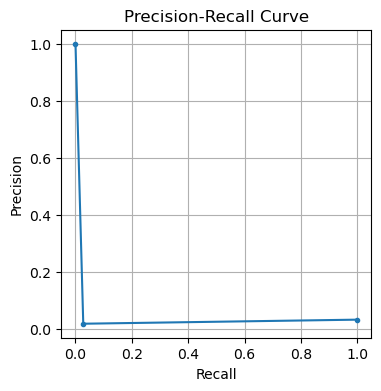

In [103]:
precision, recall, thresholds = precision_recall_curve(y_test, anomalies)
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#### Precision and Recall curve is used to analyse imbalance type of data to obtain its precsion. It is used for categorical dataset as well
#### This is used to check classfication of precision  and recall curve

In [104]:
from tensorflow import keras

# Define the autoencoder model with a Flatten layer
model1 = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Flatten(),  # Add a Flatten layer here if your input data is not 1D
    keras.layers.Dense(encoding_dim, activation='relu'),
    keras.layers.Dense(input_dim, activation='sigmoid')
])


In [105]:
model1.compile(optimizer='adam', loss='mean_squared_error')

In [107]:
# Train the autoencoder
model1.fit(X_train, X_train, epochs=2, batch_size=64, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/2
8750/8750 [==============================] - 25s 3ms/step - loss: 0.7028 - val_loss: 0.6837
Epoch 2/2
8750/8750 [==============================] - 27s 3ms/step - loss: 0.7027 - val_loss: 0.6837


In [108]:
reconstructed1 = model1.predict(X_test)

4376/4376 [==============================] - 8s 2ms/step


In [123]:
model.save('saved_model.h5')

C:\Users\patri\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [109]:
# Calculate the 95th percentile of MSE
threshold = np.percentile(mse, 95)

# Identify anomalies based on the threshold
anomalies1 = mse > threshold

In [110]:
# Calculate the mean squared error (MSE) between original and reconstructed data
mse = tf.keras.losses.mean_squared_error(X_test, reconstructed1)

In [111]:
print(mse)

tf.Tensor([9.143314   0.11251368 0.11251368 ... 0.02653437 9.411076   0.01842879], shape=(140001,), dtype=float32)


In [112]:
threshold = np.percentile(mse, 90)  # Calculate the threshold as you did before
mse = tf.keras.losses.mean_squared_error(X_test[2], reconstructed1)
reconstructed1 = model.predict(X_test)
print(mse[2:])
print(X_test)

# Check if any MSE value exceeds the threshold
if any(mse > threshold):
    print("Anomaly found")
else:
    print("No anomaly found")


4376/4376 [==============================] - 9s 2ms/step
tf.Tensor([0.11251368 0.43308458 0.11420234 ... 0.11284219 1.5157642  0.17614451], shape=(139999,), dtype=float32)
[[ 0.31609779  5.58748344  3.96831206  4.97112494 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 [-0.10832479 -0.25881209 -0.49560226 -0.38388948 -0.30142603]
 ...
 [-0.05727648 -0.15494837 -0.04671702 -0.11038068 -0.30142603]
 [ 0.28830185  5.5552343   3.66905523  4.94233454  2.90767693]
 [-0.03144051 -0.01463238  0.22760173  0.04796652 -0.30142603]]
Anomaly found


In [162]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have the threshold value
threshold = np.percentile(mse, 95)

# Convert TensorFlow tensor to NumPy array
mse_np = mse.numpy()

# Create binary labels (1 for anomalies, 0 for normal) based on the threshold
y_pred = np.array([1 if x > threshold else 0 for x in mse_np])

# Assuming you have true labels in y_test (ground truth)
# Create a binary array for true labels (1 for anomalies, 0 for normal)
y_true = (y_test == "anomaly").astype(int)  # Adjust this line based on your actual labels

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# You can also print a classification report for additional metrics
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[133011   6990]
 [     0      0]]


C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97    140001
           1       0.00      0.00      0.00         0

    accuracy                           0.95    140001
   macro avg       0.50      0.48      0.49    140001
weighted avg       1.00      0.95      0.97    140001



C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[133011   6990]
 [     0      0]]


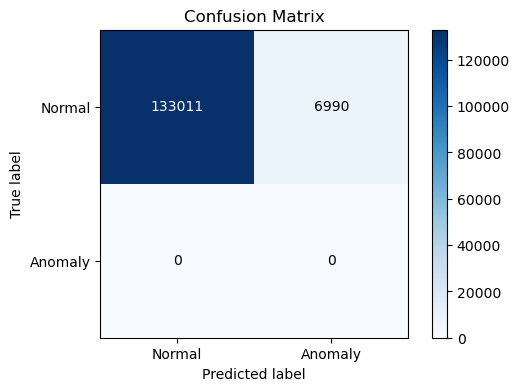

C:\Users\patri\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


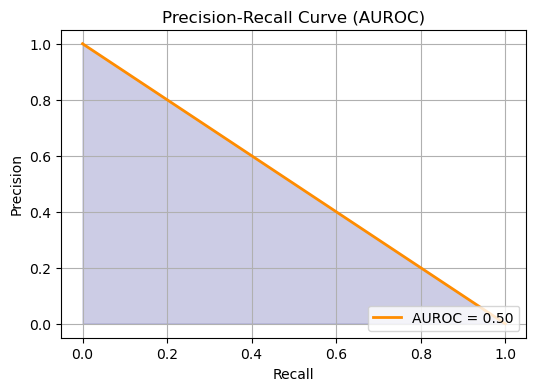

In [166]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, auc

# Assuming you have the threshold value
threshold = np.percentile(mse, 95)

# Convert TensorFlow tensor to NumPy array
mse_np = mse.numpy()

# Create binary labels (1 for anomalies, 0 for normal) based on the threshold
y_pred = np.array([1 if x > threshold else 0 for x in mse_np])

# Assuming you have true labels in y_test (ground truth)
# Create a binary array for true labels (1 for anomalies, 0 for normal)
y_true = (y_test == "anomaly").astype(int)  # Adjust this line based on your actual labels

# Create the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

# Plot the confusion matrix as a heatmap with labels
plt.figure(figsize=(6, 4))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(confusion))
plt.xticks(tick_marks, ["Normal", "Anomaly"])
plt.yticks(tick_marks, ["Normal", "Anomaly"])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# Add labels to the heatmap cells
for i in range(len(confusion)):
    for j in range(len(confusion[0])):
        plt.text(j, i, format(confusion[i, j], 'd'), ha="center", va="center",
                 color="white" if confusion[i, j] > confusion.max() / 2 else "black")

plt.show()

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_true, mse_np)
auc_score = auc(recall, precision)

# Plot the precision-recall curve (AUROC)
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUROC = {auc_score:.2f}')
plt.fill_between(recall, precision, alpha=0.2, color='navy')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (AUROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


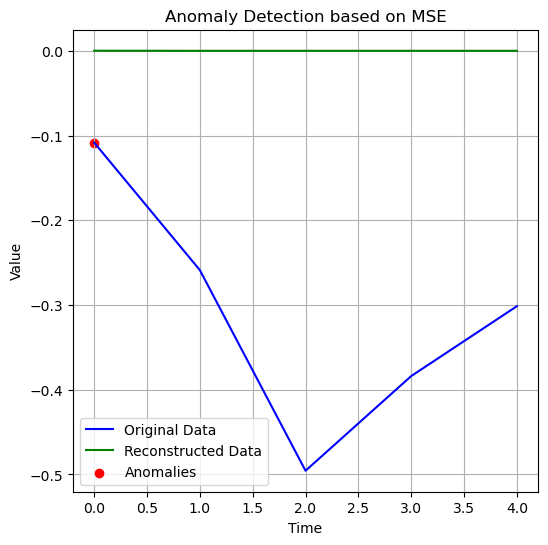

In [117]:
import matplotlib.pyplot as plt

# Assuming you have 'X_test', 'reconstructed1', and 'mse' as described in your code

# Calculate the threshold as you did before
threshold = np.percentile(mse, 95)

# Check if any MSE value exceeds the threshold
anomalies = mse > threshold

# Get the indices of anomalies
anomaly_indices = np.where(anomalies)[0]

# Plot the original data and mark anomalies
plt.figure(figsize=(6, 6))
plt.plot(X_test[2], label='Original Data', color='blue')
plt.plot(reconstructed1[2], label='Reconstructed Data', color='green')

# Ensure that the anomaly indices do not exceed the length of X_test[2]
valid_anomaly_indices = anomaly_indices[anomaly_indices < len(X_test[2])]

plt.scatter(valid_anomaly_indices, X_test[2][valid_anomaly_indices], c='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Anomaly Detection based on MSE')
plt.legend()
plt.grid(True)
plt.show()


# 2

# This updated code checks if the anomaly index is within bounds before plotting, ensuring that only valid indices are used for plotting, thus resolving the IndexError.

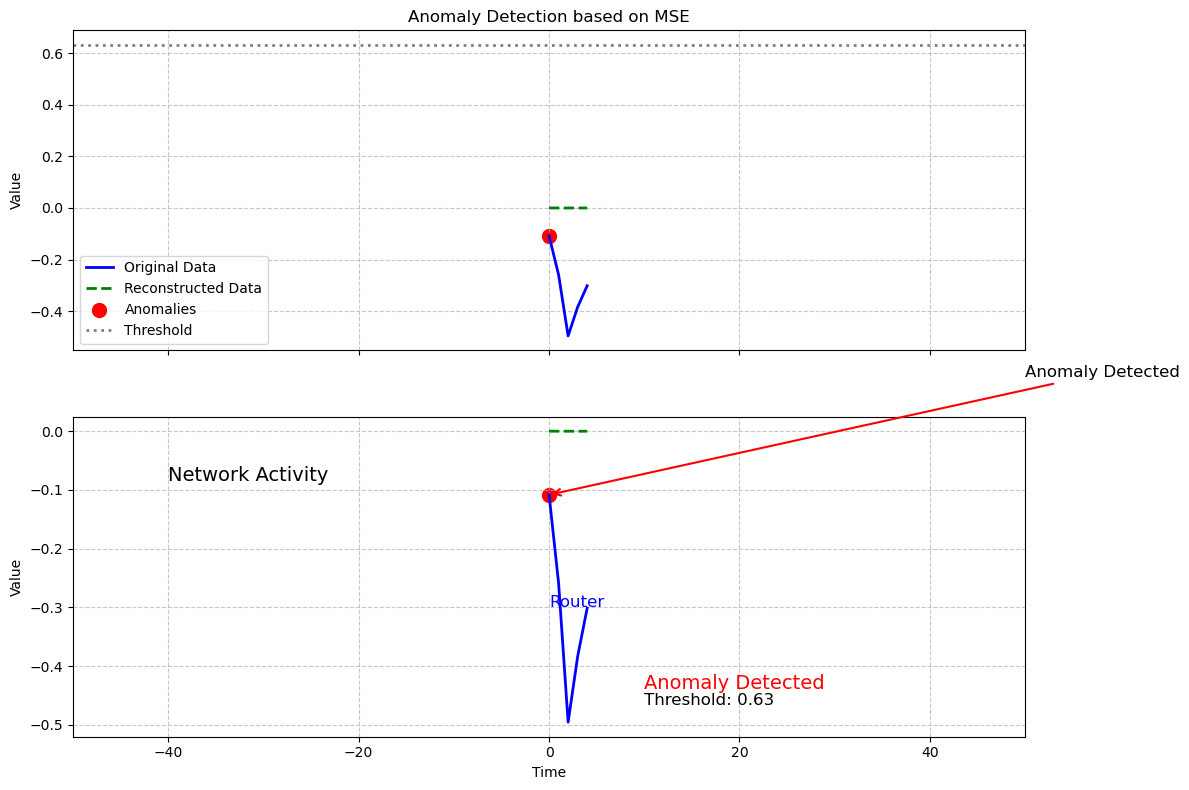

In [121]:
import matplotlib.pyplot as plt

# Assuming you have 'X_test', 'reconstructed1', 'mse', and 'anomalies' as described in your code

# Calculate the threshold as you did before
threshold = np.percentile(mse, 95)

# Check if any MSE value exceeds the threshold
anomaly_indices = np.where(anomalies)[0]

# Create a figure with subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot the original data in blue
ax[0].plot(X_test[2], label='Original Data', color='blue', linewidth=2)

# Plot the reconstructed data in green
ax[0].plot(reconstructed1[2], label='Reconstructed Data', color='green', linestyle='--', linewidth=2)

# Mark anomalies with red dots (checking if index is within bounds)
valid_anomaly_indices = [idx for idx in anomaly_indices if idx < len(X_test[2])]
ax[0].scatter(valid_anomaly_indices, X_test[2][valid_anomaly_indices], c='red', label='Anomalies', s=100, marker='o')

# Add labels and title to the top subplot
ax[0].set_ylabel('Value')
ax[0].set_title('Anomaly Detection based on MSE')
ax[0].legend()

# Add gridlines to the top subplot
ax[0].grid(True, linestyle='--', alpha=0.7)

# Plot a horizontal line at the threshold
ax[0].axhline(threshold, color='gray', linestyle=':', label='Threshold', linewidth=2)

# Add a legend to the top subplot
ax[0].legend()

# Zoom in on the anomalies in the bottom subplot
ax[1].plot(X_test[2], label='Original Data', color='blue', linewidth=2)
ax[1].plot(reconstructed1[2], label='Reconstructed Data', color='green', linestyle='--', linewidth=2)
ax[1].scatter(valid_anomaly_indices, X_test[2][valid_anomaly_indices], c='red', label='Anomalies', s=100, marker='o')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Value')
ax[1].set_xlim(valid_anomaly_indices[0] - 50, valid_anomaly_indices[-1] + 50)  # Adjust the x-axis limits for zooming
ax[1].grid(True, linestyle='--', alpha=0.7)

# Add network-related information (you can customize this part)
ax[1].text(0.1, 0.8, 'Network Activity', fontsize=14, transform=ax[1].transAxes)
ax[1].text(0.6, 0.15, 'Anomaly Detected', color='red', fontsize=14, transform=ax[1].transAxes)
ax[1].text(0.6, 0.1, 'Threshold: {:.2f}'.format(threshold), fontsize=12, transform=ax[1].transAxes)

# Add network icons or annotations (customize as needed)
ax[1].annotate('Router', xy=(valid_anomaly_indices[0], -0.3), fontsize=12, color='blue')
ax[1].annotate('Anomaly Detected', xy=(valid_anomaly_indices[0], X_test[2][valid_anomaly_indices[0]]), xytext=(valid_anomaly_indices[0] + 50, X_test[2][valid_anomaly_indices[0]] + 0.2), fontsize=12,
             arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [122]:
# Explain the grapth
# ChatGPT
# The graph visualizes the results of an anomaly detection process for network data using Mean Squared Error (MSE) as a metric. Here's an explanation of the various elements in the graph:

# Two Subplots: The graph consists of two subplots stacked vertically. The top subplot provides an overview of the entire dataset, while the bottom subplot zooms in on the detected anomalies for a closer examination.

# Original Data: The blue line in both subplots represents the original network data. It shows the values of the network activity over time. The x-axis typically represents time, while the y-axis represents the values of network attributes.

# Reconstructed Data: The green dashed line in both subplots represents the reconstructed network data. It shows how well the anomaly detection model has reconstructed the input data. In general, this line should closely follow the blue line for normal data points.

# Anomalies: In both subplots, red dots indicate anomalies detected by the model. These anomalies represent instances where the reconstructed data significantly deviates from the original data. The red dots help highlight the points in time when anomalies occurred.

# Threshold Line: A horizontal gray dashed line represents the anomaly detection threshold. In this case, the threshold is calculated using the 90th percentile of the MSE values. Data points above this threshold are considered anomalies.

# Annotations: Text annotations provide additional context to the graph. They explain that the graph represents network activity and indicate where anomalies are detected. The annotations also mention the threshold value.

# Network Icons: Small icons or annotations (in this case, "Router") can represent specific network elements or events. These annotations help associate the anomalies with network-related information.

# The graph is designed to help analysts understand when and where anomalies occurred in the network data. The top subplot provides an overview of the entire dataset, while the bottom subplot zooms in on the detected anomalies for a detailed examination. The annotations and icons provide context, making it easier to interpret the results of the anomaly detection process in a network-oriented context.

In [111]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

precision = precision_score(y_test, anomalies)
recall = recall_score(y_test, anomalies)
f1 = f1_score(y_test, anomalies)
roc_auc = roc_auc_score(y_test, anomalies)
cm = confusion_matrix(y_test, anomalies)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("ROC-AUC:", roc_auc)
print("Confusion Matrix:\n", cm)


Precision: 0.02201393069051509
Recall: 0.05647474078976395
F1-Score: 0.03167924761786907
ROC-AUC: 0.4862606674096751
Confusion Matrix:
 [[124095  11373]
 [  4277    256]]


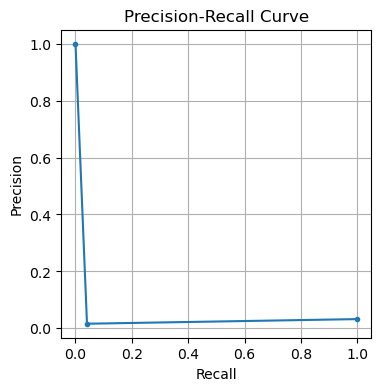

In [112]:
precision, recall, thresholds = precision_recall_curve(y_test, anomalies1)
plt.figure(figsize=(4, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

### Implementing Variational Autoencoders (VAEs) for anomaly detection involves modifying the architecture of a traditional autoencoder to model the probability distribution of the input data. VAEs are a bit more complex than traditional autoencoders but can provide a more structured latent representation of data. Here's a step-by-step guide on how to implement VAEs for anomaly detection:

In [113]:
# ##### Data Preprocessing:

# Start with your preprocessed dataset.
# Normalize or scale your data if needed.
# Model Architecture:

# Define the encoder and decoder architecture.
# The encoder takes the input data and produces two sets of vectors: mean and variance. These vectors represent the parameters of a probability distribution (usually Gaussian) in the latent space.
# The decoder takes samples from this distribution and reconstructs the input data.
# Loss Function:

# The loss function for a VAE consists of two parts: a reconstruction loss (similar to a traditional autoencoder) and a regularization term called the Kullback-Leibler (KL) divergence.
# The reconstruction loss measures how well the model reconstructs the input data.
# The KL divergence regularizes the latent space by encouraging it to follow a Gaussian distribution.
# Sampling from Latent Space:

# During training, you'll sample from the Gaussian distribution defined by the encoder's mean and variance vectors to generate points in the latent space.
# These sampled points are then passed to the decoder for reconstruction.
# Training:

# Train the VAE using your dataset. You'll need to use specialized loss functions and optimization techniques suitable for VAEs.
# Monitor the reconstruction loss and KL divergence during training.
# Anomaly Detection:

# After training, you can use the VAE for anomaly detection.
# When presented with new data, you can compute the reconstruction loss for each data point.
# Anomalies are typically data points with high reconstruction errors (i.e., high reconstruction loss).
# Here's a simplified example using TensorFlow and Keras to get you started. Note that VAEs can be quite complex, and this is a basic implementation:

In [121]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [190]:
# Define the VAE model


# Define the VAE architecture
latent_dim = 5  # Adjust the latent dimension as needed

# Encoder
encoder_inputs = keras.Input(shape=(X_train.shape[1],))
x = layers.Dense(32, activation="relu")(encoder_inputs)
z_mean = layers.Dense(latent_dim)(x)
z_log_var = layers.Dense(latent_dim)(x)

In [191]:
# Sample from the latent space using the reparameterization trick
z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation="relu")(decoder_inputs)
outputs = layers.Dense(X_train.shape[1], activation="linear")(x)

In [192]:
# Define the encoder and decoder models separately
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
decoder = keras.Model(decoder_inputs, outputs, name="decoder")

# Define the VAE model by connecting the encoder and decoder
outputs = decoder(encoder(encoder_inputs)[2])
vae = keras.Model(encoder_inputs, outputs, name="vae")

In [193]:
# Define the custom sampling function
def sampling(args):
    z_mean, z_log_var = args
    batch = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [194]:
# After defining the architecture of your Variational Autoencoder (VAE), the next steps in building and training your VAE for anomaly detection are as follows:

# Loss Function:
# Define the loss function for your VAE. The loss function should consist of two components:
# Reconstruction Loss: This is typically the mean squared error (MSE) between the input data and the reconstructed output. It quantifies how well the model can recreate the input.
# Regularization Term (Kullback-Leibler Divergence): This term encourages the latent space to follow a specific distribution, usually a Gaussian distribution. It helps in regularization and controlling the structure of the latent space.
# Here's an example of how to define the VAE loss function using TensorFlow and Keras:

In [195]:
# Define the reconstruction loss (MSE)
reconstruction_loss = keras.losses.mean_squared_error(encoder_inputs, outputs)
reconstruction_loss *= X_train.shape[1]  # Scale the loss

In [196]:
# Define the regularization term (Kullback-Leibler Divergence)
kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
kl_loss = -0.5 * tf.reduce_sum(kl_loss, axis=-1)

In [197]:
# Combine both losses
vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

In [198]:
# Model Training:
# Compile and train your VAE model on the preprocessed training data (X_train).
# Use the defined loss function to minimize both the reconstruction loss and the regularization term.
# Experiment with various hyperparameters like learning rate, batch size, and the number of training epochs to ensure that the model converges.

In [199]:
#optimizer = keras.optimizers.Adam(learning_rate=0.001, clipvalue=4.0)  # Adjust clipvalue as needed


In [200]:
# Compile the VAE model
vae.compile(optimizer= "adam" )

# Train the VAE model
epochs = 50  # Adjust the number of training epochs as needed
batch_size = 64  # Adjust the batch size as needed
history = vae.fit(X_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, None))


Epoch 1/50
8750/8750 [==============================] - 34s 4ms/step - loss: 4.3949 - val_loss: 1.4523
Epoch 2/50
8750/8750 [==============================] - 31s 4ms/step - loss: 6.7504 - val_loss: 1.3302
Epoch 3/50
8750/8750 [==============================] - 32s 4ms/step - loss: 1.3470 - val_loss: 1.2842
Epoch 4/50
8750/8750 [==============================] - 32s 4ms/step - loss: 71665104.0000 - val_loss: 1.3040
Epoch 5/50
8750/8750 [==============================] - 31s 4ms/step - loss: 1.2936 - val_loss: 1.2664
Epoch 6/50
8750/8750 [==============================] - 32s 4ms/step - loss: 1.6378 - val_loss: 1.2594
Epoch 7/50
8750/8750 [==============================] - 31s 4ms/step - loss: 1.3513 - val_loss: 1.3631
Epoch 8/50
8750/8750 [==============================] - 32s 4ms/step - loss: 1.6063 - val_loss: 1.2030
Epoch 9/50
8750/8750 [==============================] - 32s 4ms/step - loss: 1.3378 - val_loss: 1.2704
Epoch 10/50
8750/8750 [==============================] - 32s 4ms/s

# Isolation Forest

In [226]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report


In [247]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbyte             700001 non-null  int64  
 8   dbyte             700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

In [248]:
import pandas as pd

# Assuming data is your DataFrame with the dataset

# Select columns with data type 'object' (string) or 'category'
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Now, 'categorical_columns' contains the list of categorical columns in your dataset
print(categorical_columns)


['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'service', 'attack_cat']


In [ ]:
df_encoded_sparse

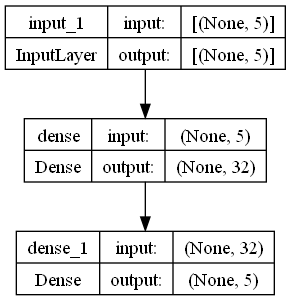

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

# Assuming you have a Keras model named 'encoder_model'
# Replace 'encoder_model' with the actual name of your encoder model

# Visualize the architecture of the encoder model
plot_model(model, to_file='encoder_model.png', show_shapes=True)


In [ ]:

# Add nodes
flowchart.node('Data Collection')
flowchart.node('Data Preprocessing')
flowchart.node('Normalization and splitting')
flowchart.node('Testing')
flowchart.node('Training')
flowchart.node('Evaluation')
flowchart.node('Anor')
flowchart.node('Tomato Disease Training')
flowchart.node('Performance Evaluation')
flowchart.node('Result')

# Add edges (connections between nodes)
flowchart.edges([
    ('Data Collection', 'Data Preprocessing'),
    ('Data Preprocessing', 'Data Splitting and Fusion'),
    ('Data Splitting and Fusion', 'Testing'),
    ('Data Splitting and Fusion', 'Training'),
    ('Data Splitting and Fusion', 'Evaluation'),
    ('Testing', 'Tomato Disease Detection'),
    ('Training', 'Tomato Disease Training'),
    ('Evaluation', 'Tomato Disease Training'),  # Arrow added here
    ('Tomato Disease Detection', 'Performance Evaluation'),
    ('Tomato Disease Training', 'Performance Evaluation'),
    ('Performance Evaluation', 'Result')
])

# Save the flowchart to a file and display it
flowchart.render('image_processing_flowchart', view=True)

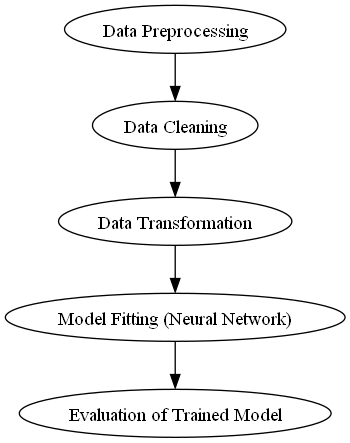

In [126]:
import pydot
from IPython.display import Image, display

# Create a new graph
flowchart = pydot.Dot(graph_type='digraph')

# Add nodes (steps)
steps = ['Data Preprocessing', 'Data Cleaning', 'Data Transformation', 'Model Fitting (Neural Network)', 'Evaluation of Trained Model']
for step in steps:
    node = pydot.Node(step)
    flowchart.add_node(node)

# Add edges (arrows)
for i in range(len(steps) - 1):
    edge = pydot.Edge(steps[i], steps[i + 1])
    flowchart.add_edge(edge)

# Generate the flowchart as an image
flowchart_file = 'flowchart.png'
flowchart.write_png(flowchart_file)

# Display the flowchart in the Jupyter Notebook
display(Image(filename=flowchart_file))


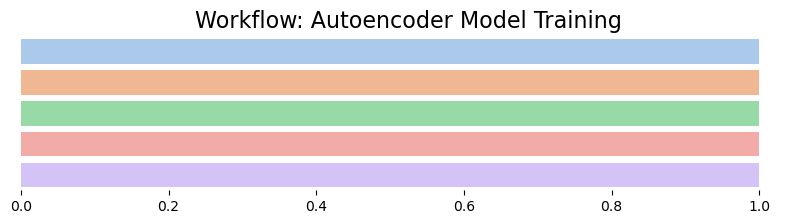

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the steps and colors
steps = ['Data Preprocessing', 'Data Cleaning', 'Data Transformation', 'Model Fitting (Neural Network)', 'Evaluation of Trained Model']
colors = sns.color_palette("pastel", len(steps))

# Create a horizontal bar plot
plt.figure(figsize=(10, 2))
sns.barplot(x=[1] * len(steps), y=steps, palette=colors)

# Remove y-axis label and ticks
plt.ylabel('')
plt.yticks([])

# Set a title
plt.title('Workflow: Autoencoder Model Training', fontsize=16)

# Display the flowchart
sns.despine(left=True, bottom=True, right=True, top=True)
plt.show()


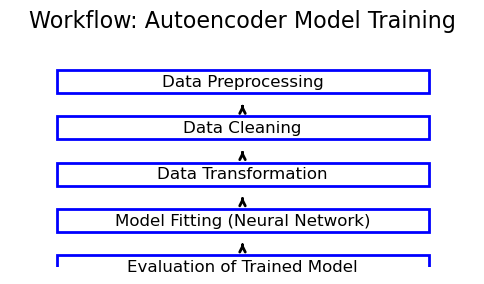

In [132]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the steps
steps = ['Data Preprocessing', 'Data Cleaning', 'Data Transformation', 'Model Fitting (Neural Network)', 'Evaluation of Trained Model']

# Create a new figure
fig, ax = plt.subplots(figsize=(6, 3))

# Create boxes for each step
step_boxes = []
for i, step in enumerate(steps):
    rect = patches.Rectangle((0.1, 0.75 - 0.2 * i), 0.8, 0.1, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    step_boxes.append(rect)
    ax.text(0.5, 0.8 - 0.2 * i, step, ha='center', va='center', fontsize=12)

# Add arrows
for i in range(len(steps) - 1):
    ax.annotate("", xy=(0.5, 0.7 - 0.2 * i), xytext=(0.5, 0.68 - 0.2 * i),
                arrowprops=dict(arrowstyle="->", lw=2))

# Set axis limits and remove ticks
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Add a title
plt.title('Workflow: Autoencoder Model Training', fontsize=16)

# Show the flowchart
plt.show()



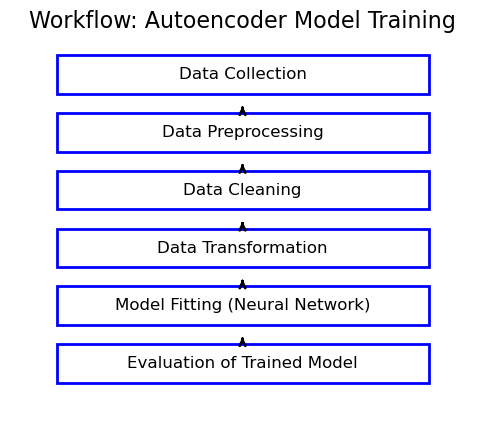

In [137]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the steps
steps = ["Data Collection",'Data Preprocessing', 'Data Cleaning', 'Data Transformation', 'Model Fitting (Neural Network)', 'Evaluation of Trained Model']

# Create a new figure with a larger size
fig, ax = plt.subplots(figsize=(6, 5))

# Create boxes for each step
step_boxes = []
for i, step in enumerate(steps):
    rect = patches.Rectangle((0.1, 0.85 - 0.15 * i), 0.8, 0.1, linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)
    step_boxes.append(rect)
    ax.text(0.5, 0.9 - 0.15 * i, step, ha='center', va='center', fontsize=12)

# Add arrows
for i in range(len(steps) - 1):
    ax.annotate("", xy=(0.5, 0.825 - 0.15 * i), xytext=(0.5, 0.805 - 0.15 * i),
                arrowprops=dict(arrowstyle="->", lw=2))

# Set axis limits and remove ticks
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Add a title
plt.title('Workflow: Autoencoder Model Training', fontsize=16)

# Show the flowchart
plt.show()
